In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [46]:
from sklearn.preprocessing import StandardScaler

In [2]:
raw_data = pd.read_csv("student-por.csv")

In [3]:
raw_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
raw_data.shape

(649, 33)

In [5]:
#Data preprocessing
raw_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_values = np.unique(raw_data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature school is: 2 -- ['GP' 'MS']
The number of values for feature sex is: 2 -- ['F' 'M']
The number of values for feature age is: 8 -- [15 16 17 18 19 20 21 22]
The number of values for feature address is: 2 -- ['R' 'U']
The number of values for feature famsize is: 2 -- ['GT3' 'LE3']
The number of values for feature Pstatus is: 2 -- ['A' 'T']
The number of values for feature Medu is: 5 -- [0 1 2 3 4]
The number of values for feature Fedu is: 5 -- [0 1 2 3 4]
The number of values for feature Mjob is: 5 -- ['at_home' 'health' 'other' 'services' 'teacher']
The number of values for feature Fjob is: 5 -- ['at_home' 'health' 'other' 'services' 'teacher']
The number of values for feature reason is: 4 -- ['course' 'home' 'other' 'reputation']
The number of values for feature guardian is: 3 -- ['father' 'mother' 'other']
The number of values for feature traveltime is: 4 -- [1 2 3 4]
The number of values for feature studytime is: 4 -- [1 2 3 4]
The number of values fo

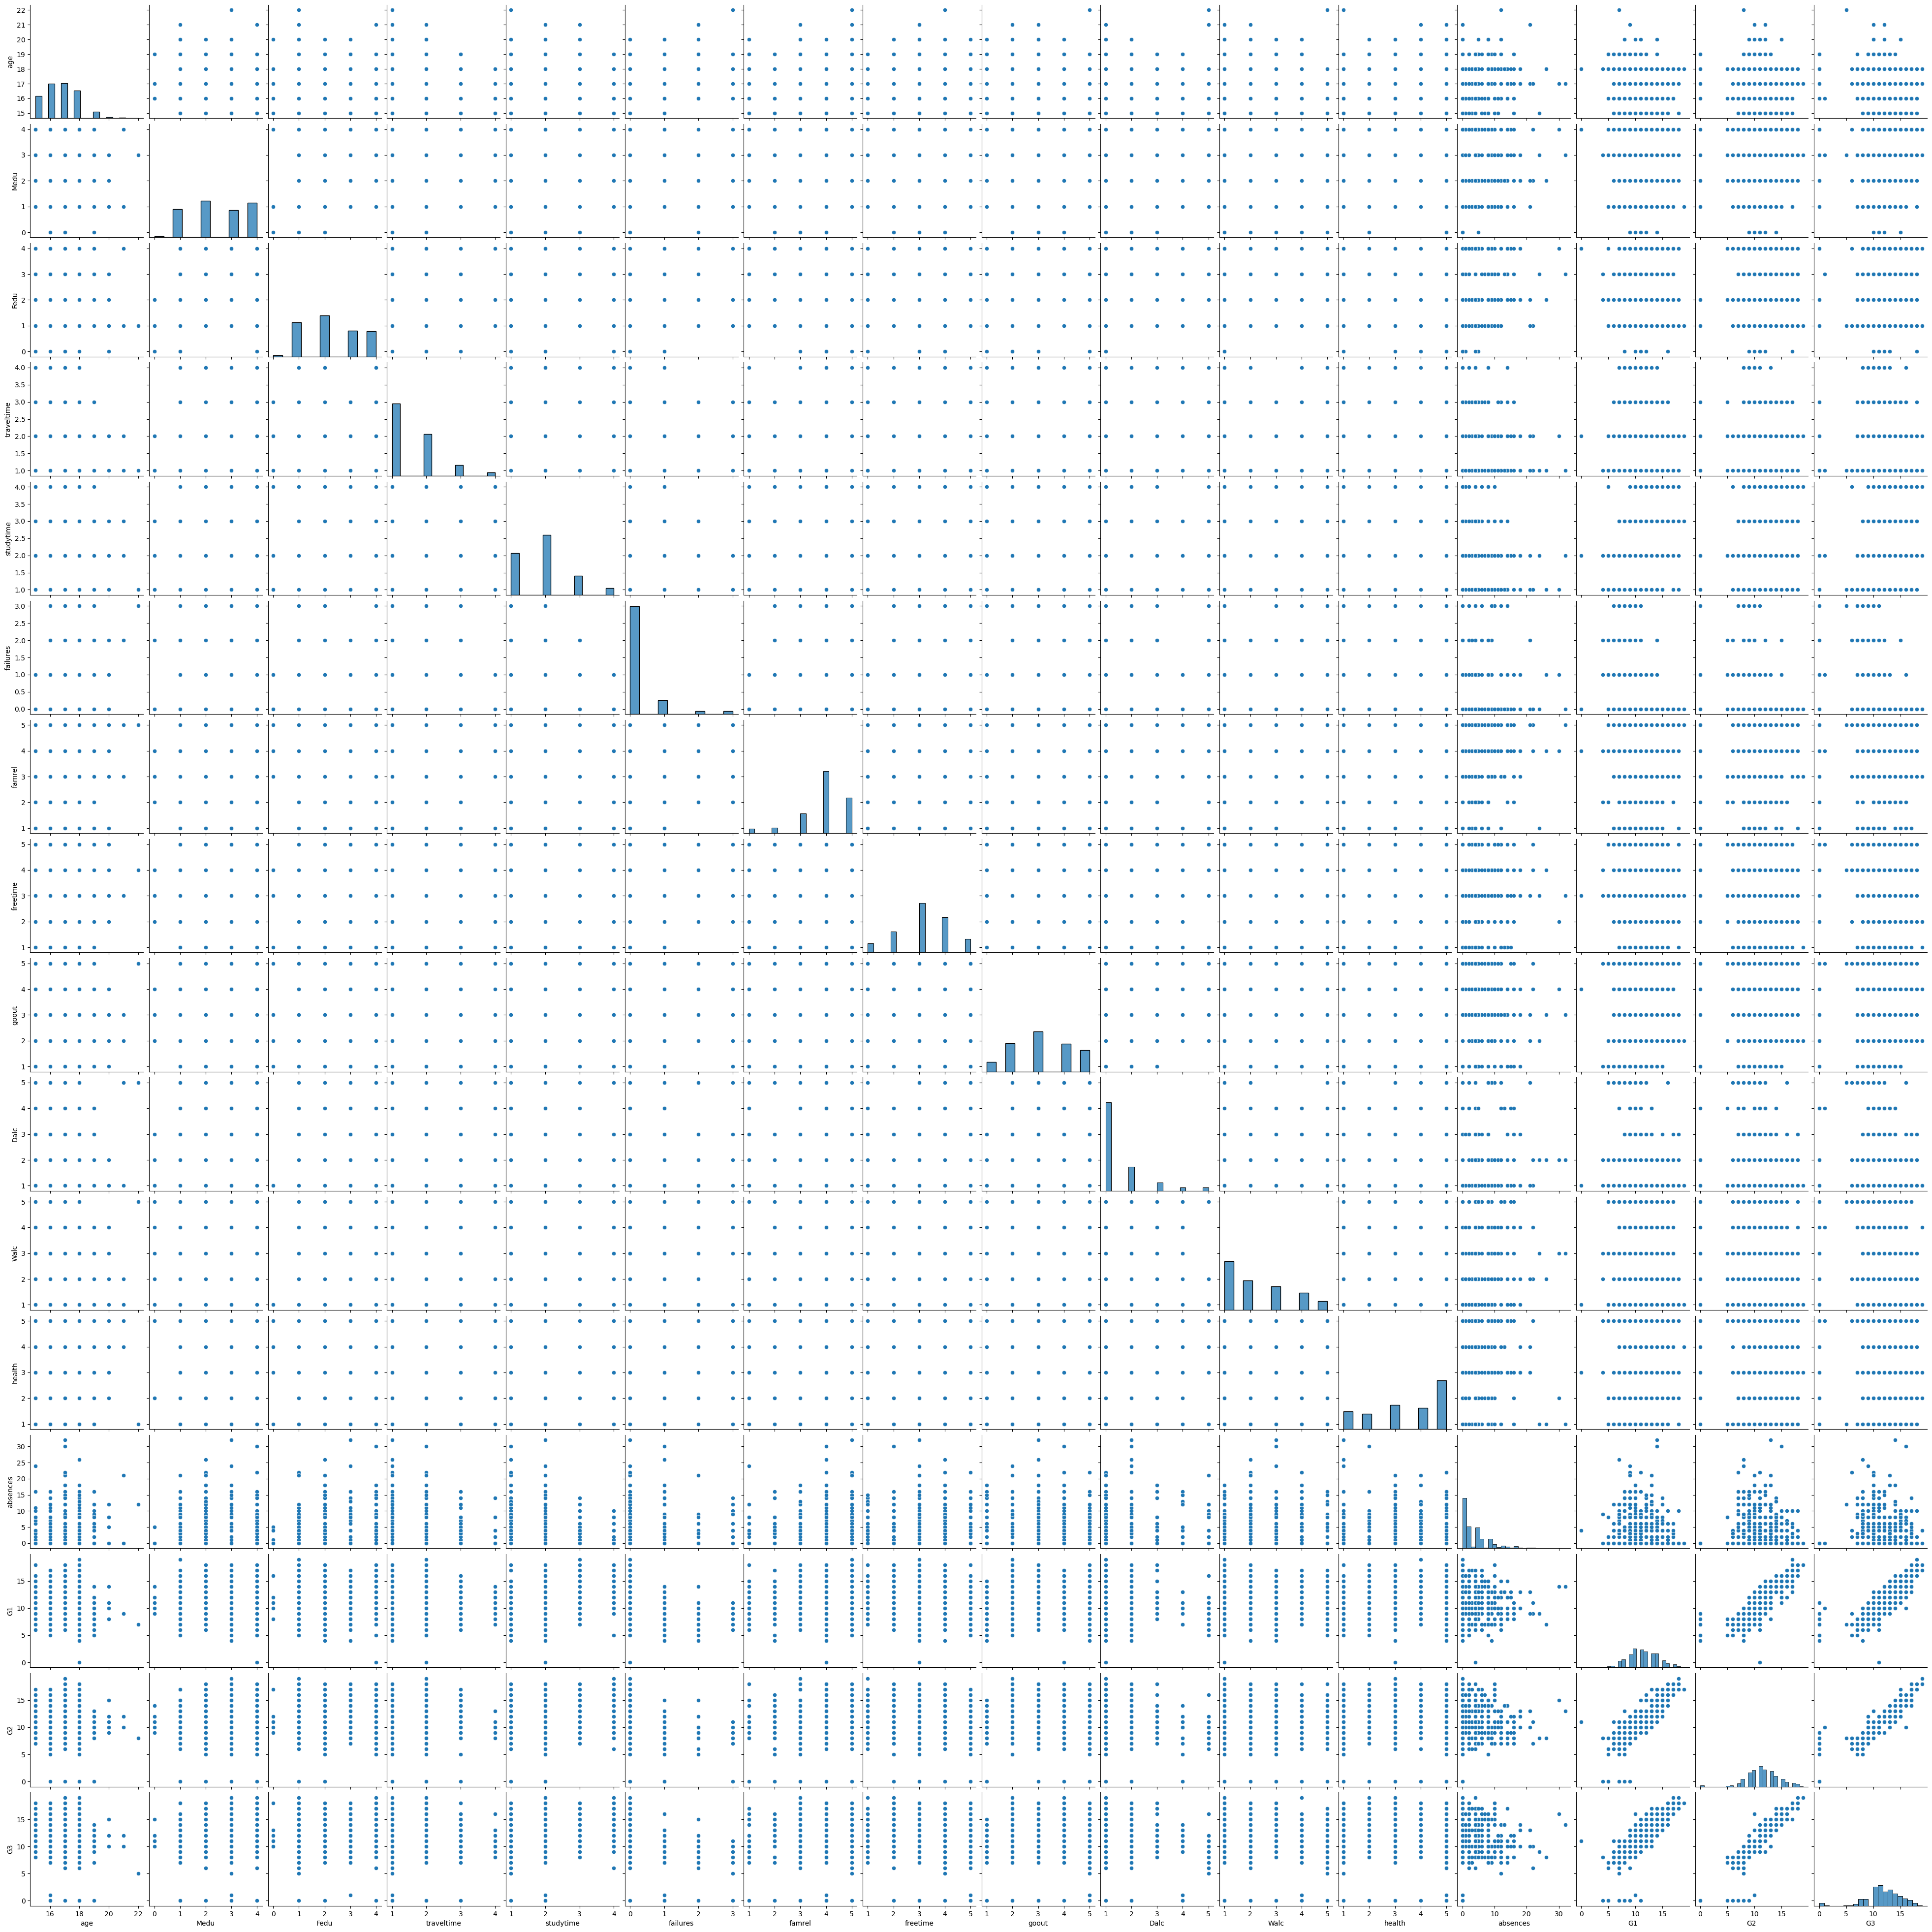

In [7]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(raw_data)


In [8]:
raw_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

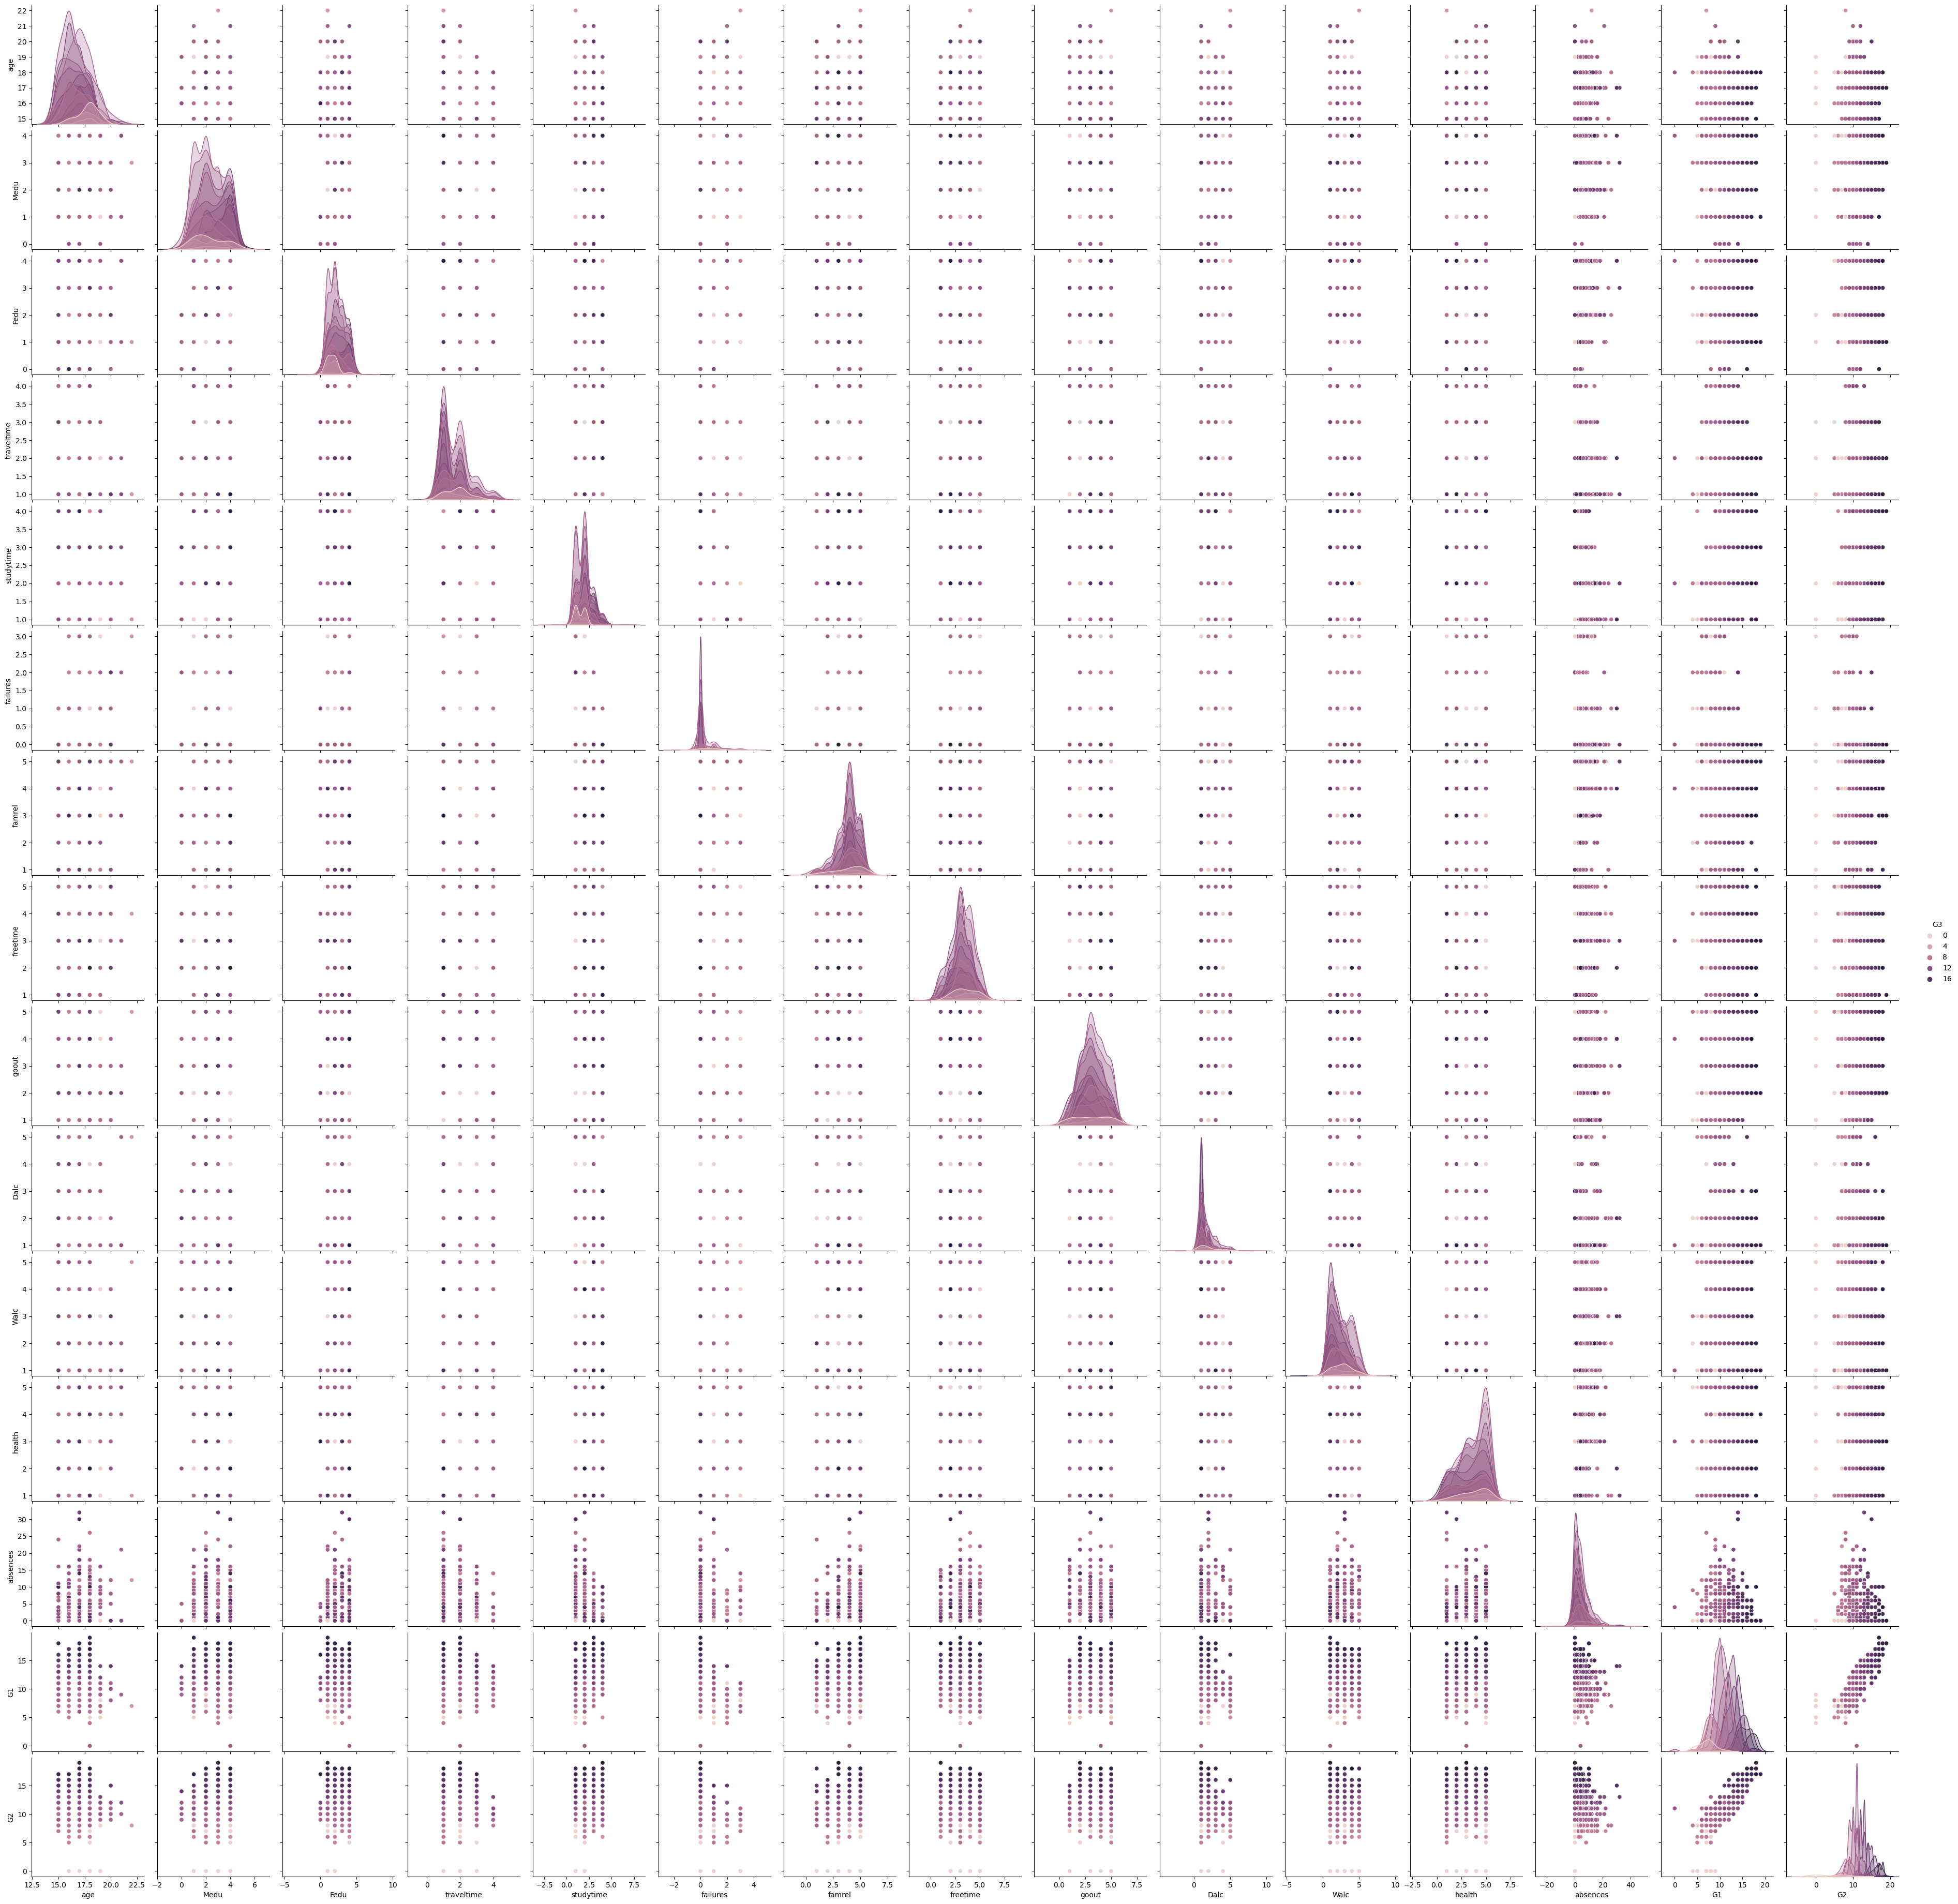

In [10]:
p = sns.pairplot(raw_data,hue = 'G3')

<Axes: xlabel='G3', ylabel='count'>

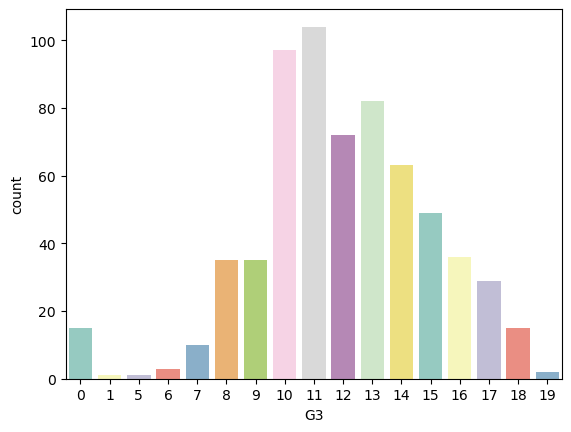

In [9]:
sns.countplot(x = 'G3', data = raw_data, palette = 'Set3')

In [11]:
raw_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

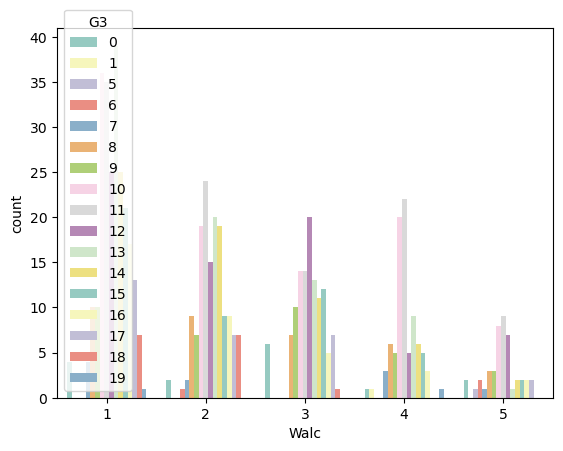

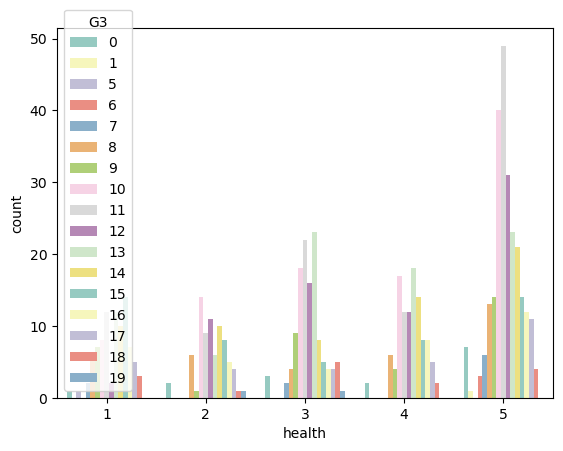

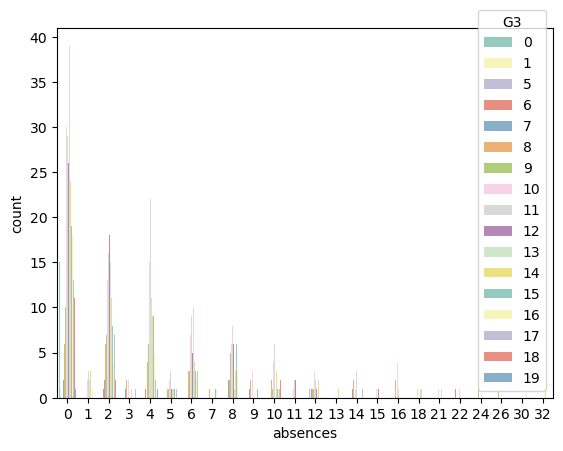

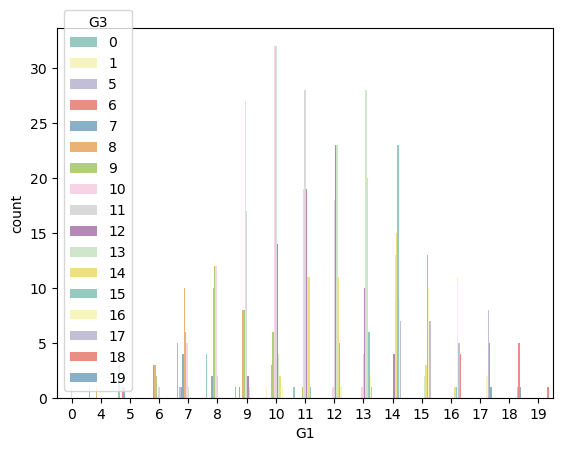

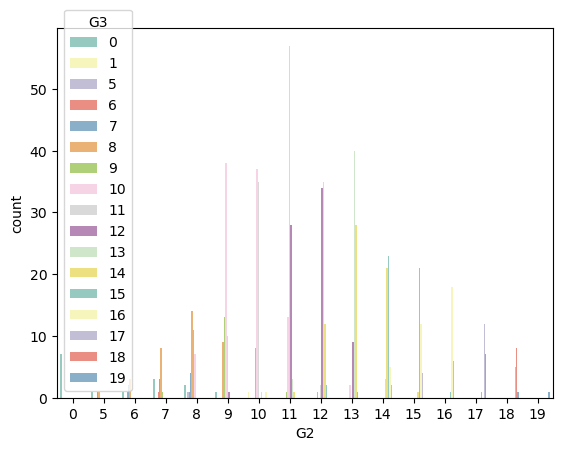

In [13]:
# Looping through all the features by our y variable - see if there is relationship

features = ['Walc','health','absences', 'G1', 'G2']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3',hue = 'G3')
    plt.show()

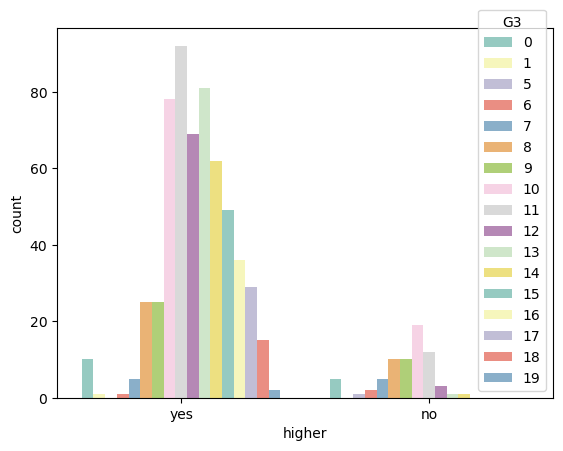

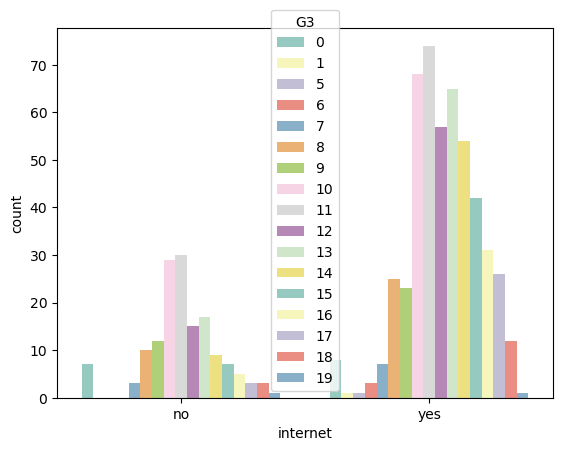

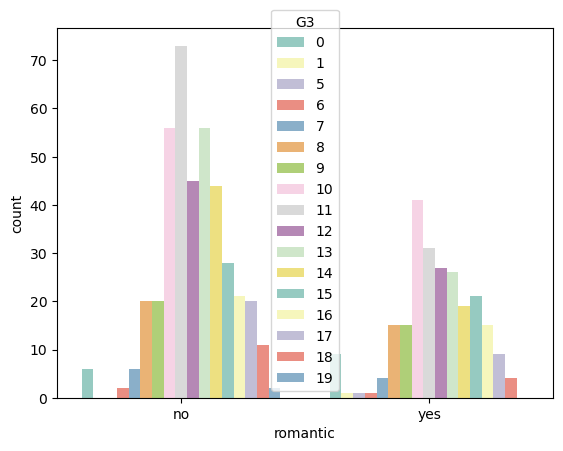

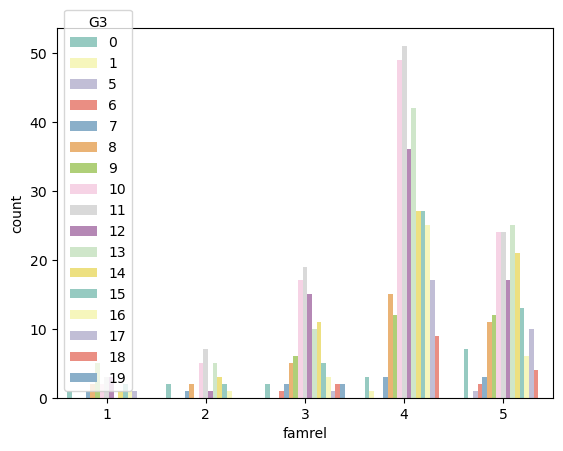

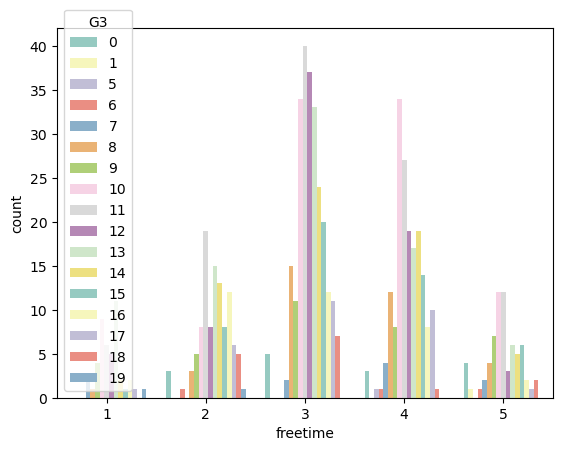

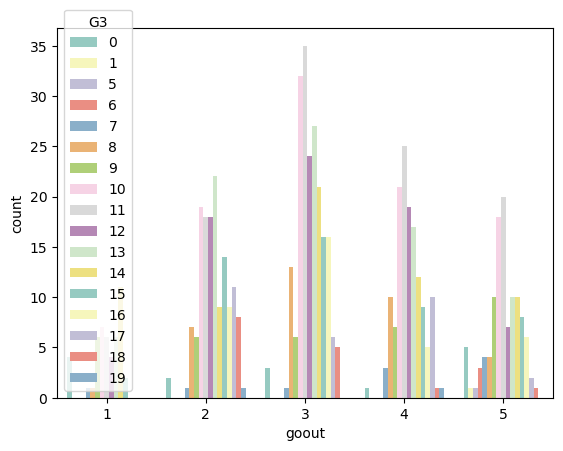

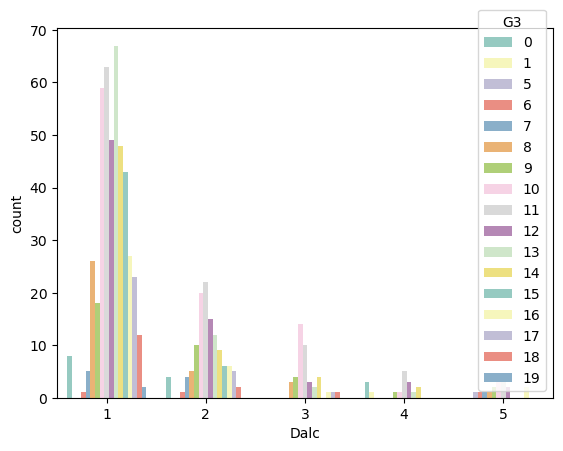

In [14]:
# Looping through all the features by our y variable - see if there is relationship

features = ['higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3',hue = 'G3')
    plt.show()

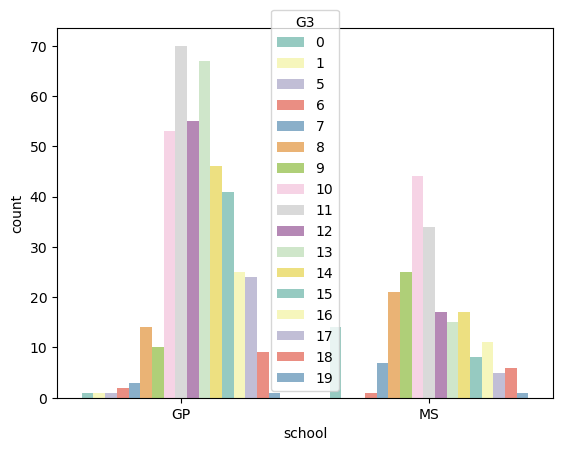

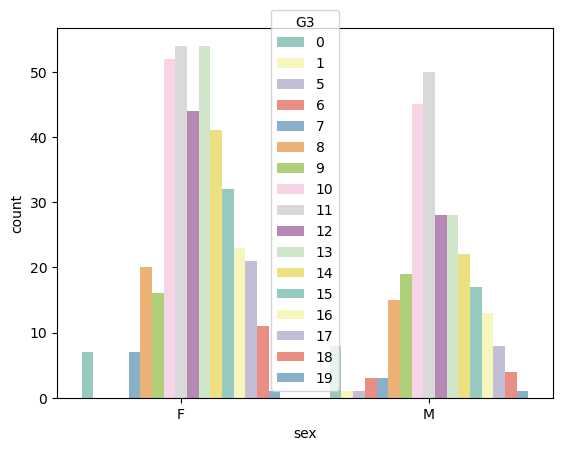

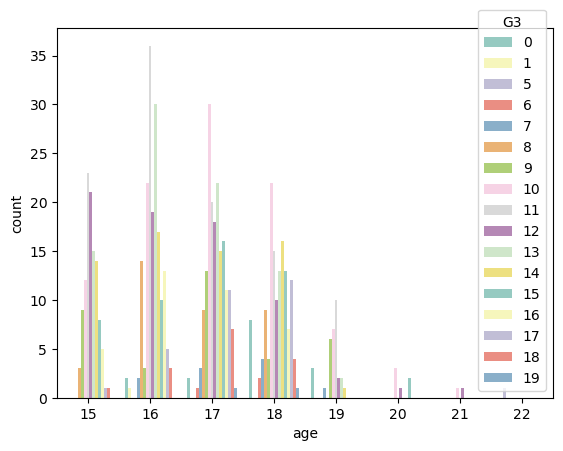

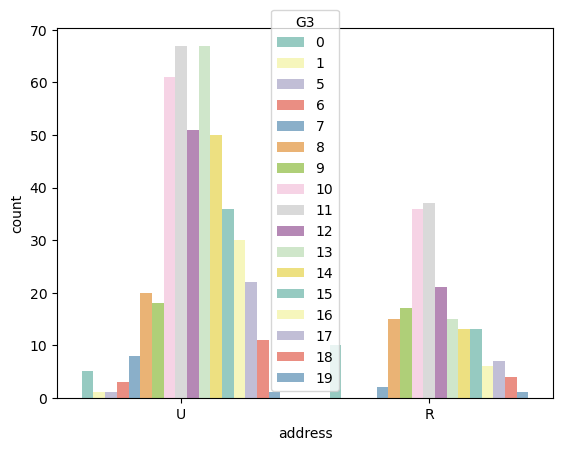

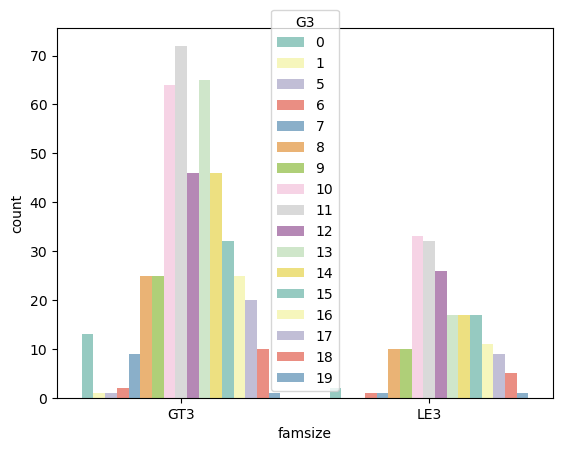

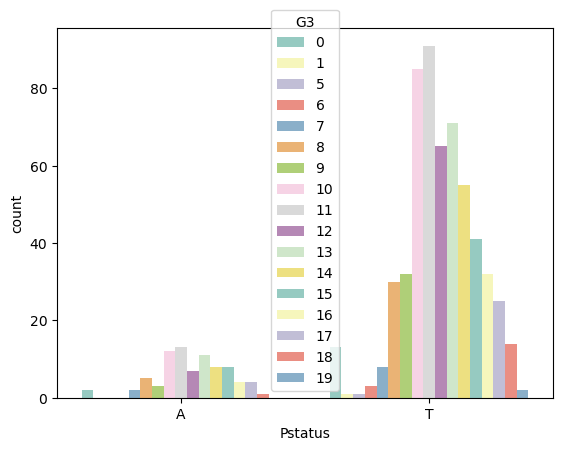

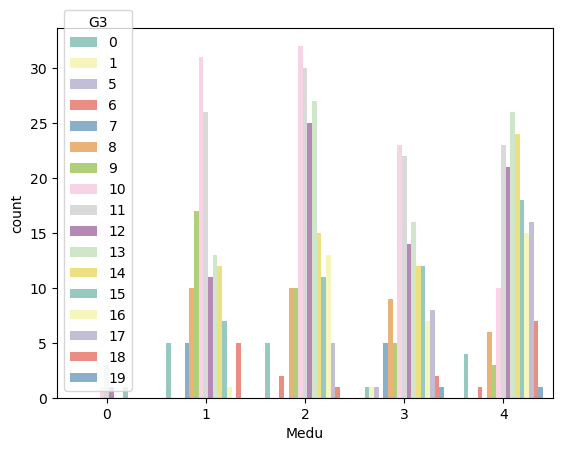

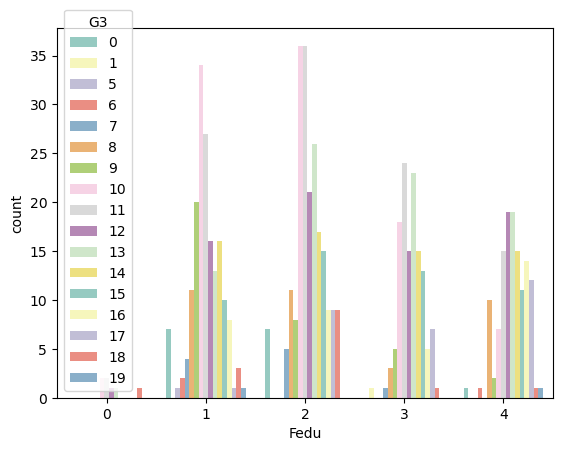

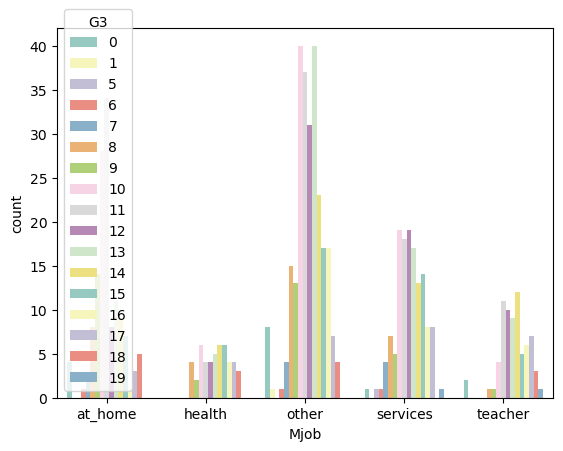

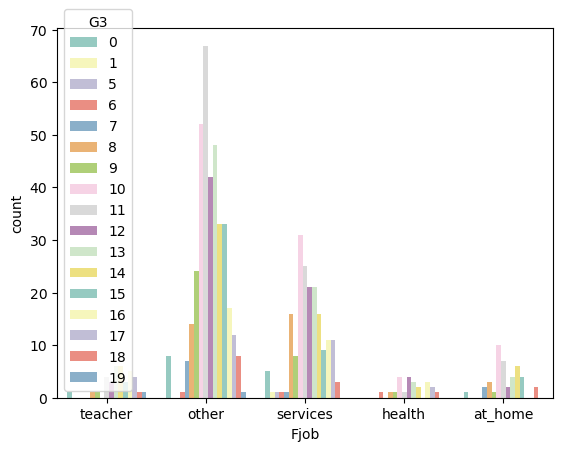

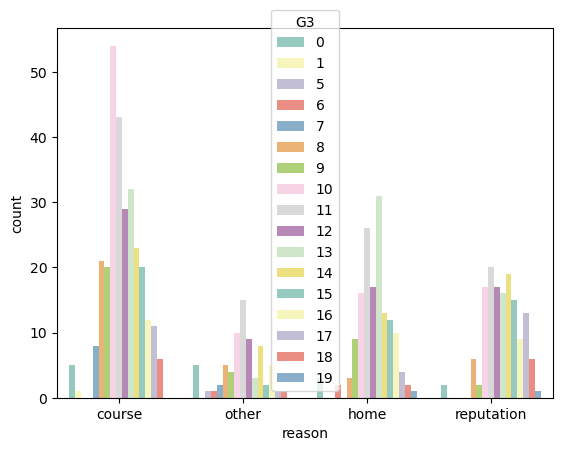

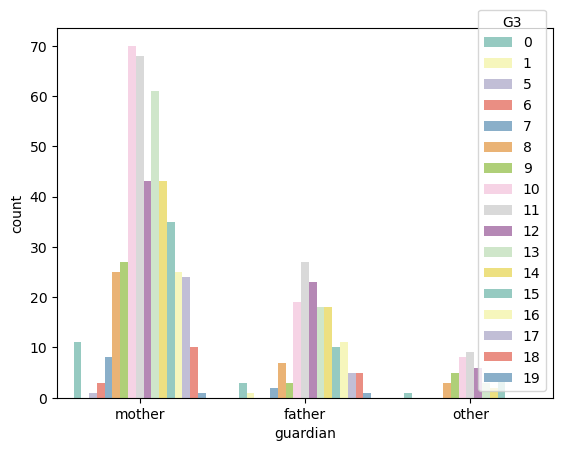

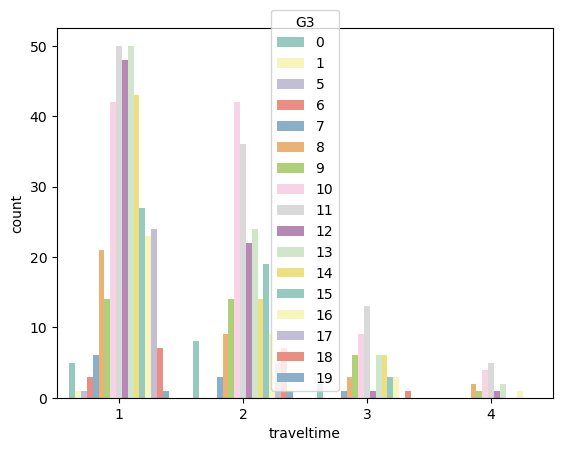

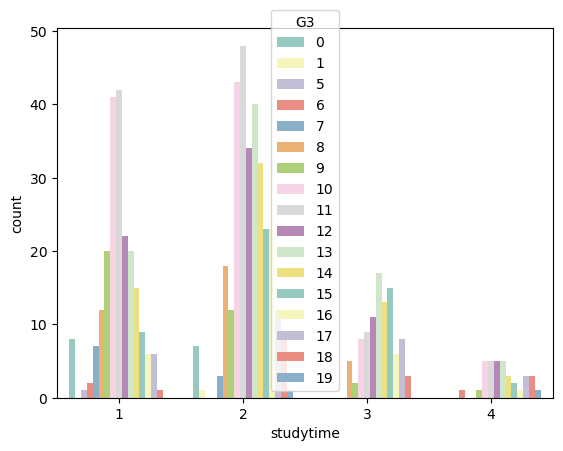

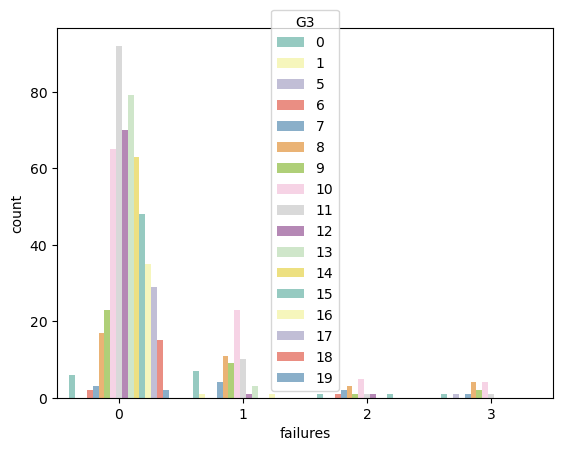

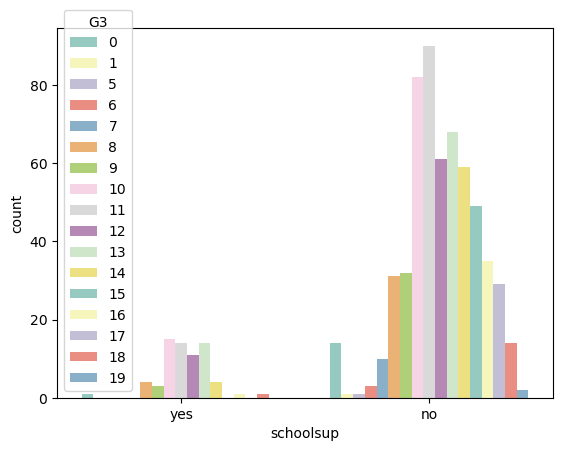

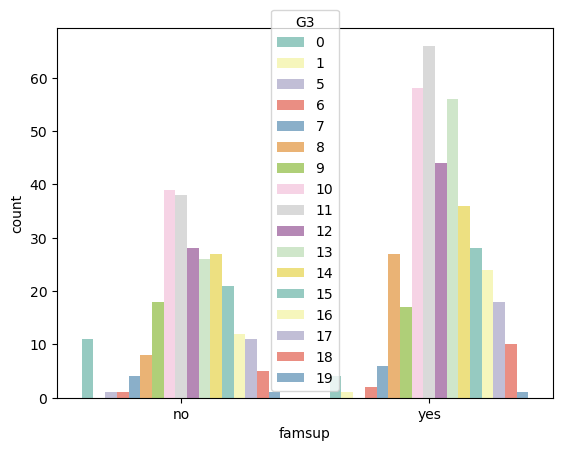

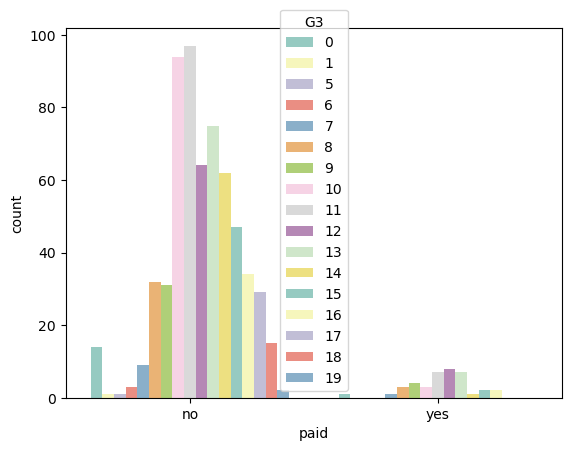

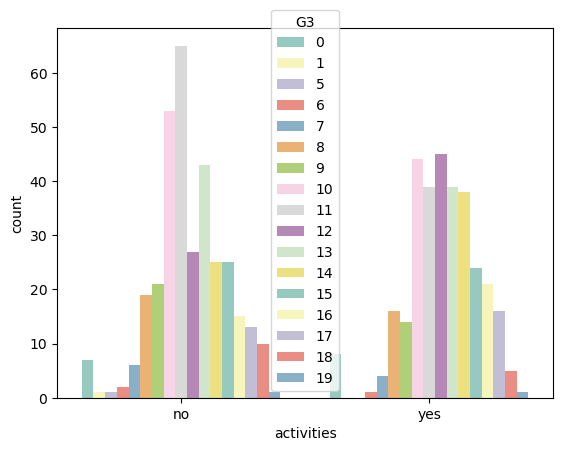

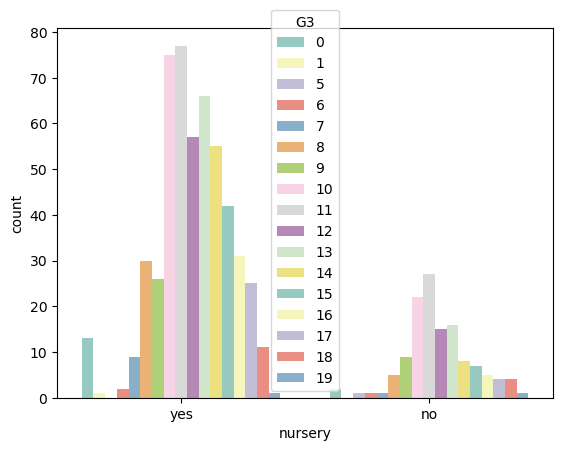

In [15]:
# Looping through all the features by our y variable - see if there is relationship

features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery']

for f in features:
    sns.countplot(x = f, data = raw_data, palette = 'Set3',hue = 'G3')
    plt.show()

In [16]:
# Feature selection and splitting the data
X = raw_data.drop('G3', axis=1).values
y = raw_data['G3']


y = (y == 'M').astype(int)

print(X.shape)
print(y.shape)

(649, 32)
(649,)


In [17]:
raw_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [18]:
raw_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [22]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data, columns = ['sex','school','address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic'])

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

# Visualizing the data
new_raw_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [23]:
# Running Correlation

hm = new_raw_data[['absences', 'G1', 'G2','G3']].corr()


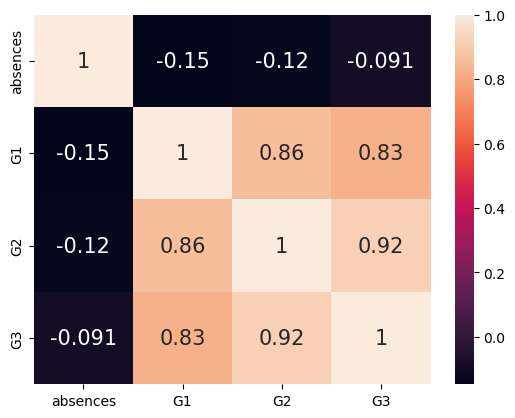

In [25]:
# Visualizing Correlation with a Heatmap

g = sns.heatmap(hm, annot = True, annot_kws={'size':15})

In [47]:
# Split the data into X & y

X = new_raw_data.drop('G3', axis = 1).values
X2 = new_raw_data.drop('G3', axis = 1)
y = new_raw_data['G3']

print(X.shape)
print(y.shape)

X

(649, 58)
(649,)


array([[18,  4,  4, ...,  0,  1,  0],
       [17,  1,  1, ...,  1,  1,  0],
       [15,  1,  1, ...,  1,  1,  0],
       ...,
       [18,  1,  1, ...,  0,  1,  0],
       [17,  3,  1, ...,  1,  1,  0],
       [18,  3,  2, ...,  1,  1,  0]])

In [48]:
# Run a Tree-based estimators (i.e. decision trees & random forests)

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [49]:
# Running Feature Importance

for i, column in enumerate(new_raw_data.drop('G3', axis = 1)):
    print('The feature importance for {} is: {:.3f}'.format(column, dt.feature_importances_[i]))

The feature importance for age is: 0.041
The feature importance for Medu is: 0.007
The feature importance for Fedu is: 0.017
The feature importance for traveltime is: 0.009
The feature importance for studytime is: 0.018
The feature importance for failures is: 0.010
The feature importance for famrel is: 0.019
The feature importance for freetime is: 0.020
The feature importance for goout is: 0.020
The feature importance for Dalc is: 0.012
The feature importance for Walc is: 0.011
The feature importance for health is: 0.023
The feature importance for absences is: 0.045
The feature importance for G1 is: 0.036
The feature importance for G2 is: 0.530
The feature importance for sex_F is: 0.003
The feature importance for sex_M is: 0.002
The feature importance for school_GP is: 0.011
The feature importance for school_MS is: 0.008
The feature importance for address_R is: 0.005
The feature importance for address_U is: 0.001
The feature importance for famsize_GT3 is: 0.006
The feature importance f

In [50]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(519, 58)
(130, 58)
(519,)
(130,)


In [51]:
# Training the Regression

lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

In [52]:
# Model Accuracy on training dataset

print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(y_train,y_pred) )   

print("")
# Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy  on the training dataset is:  0.8859257858461413
The Accuracy n2  on the training dataset is:  0.8859257858461413

The Accuracy  on the testing dataset is:  0.7400639955655183

The RMSE  on the training dataset is:  1.0704582583688127
The RMSE  on the testing dataset is:  1.7270351168029827

The MAE  on the training dataset is:  0.72713639511079
The MAE  on the testing dataset is:  0.9966421274038462

Coefficients:  [ 2.17894253e-03 -1.76922719e-02  2.42792223e-04  1.46098074e-01
  5.97833558e-03 -2.93094892e-01  4.53373495e-02  2.16665370e-02
 -1.21739209e-02  9.87963233e-03 -2.85692594e-02 -4.44916908e-02
  1.59444836e-02  1.01468721e-01  8.78034737e-01 -3.46684224e+10
 -3.46684224e+10 -2.25837879e+12 -2.25837879e+12 -3.29640991e+11
 -3.29640991e+11  2.21239473e+11  2.21239473e+11  1.54645531e+11
  1.54645531e+11  2.93670829e+11  2.93670829e+11  2.93670829e+11
  2.93670829e+11  2.93670829e+11 -6.68016112e+11 -6.68016112e+11
 -6.68016112e+11 -6.68016112e+11 -6.68016112e+1

/var/folders/t8/6zvbz6_x4b54jsm8cn3fbcq00000gn/T/ipykernel_9050/2958082234.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

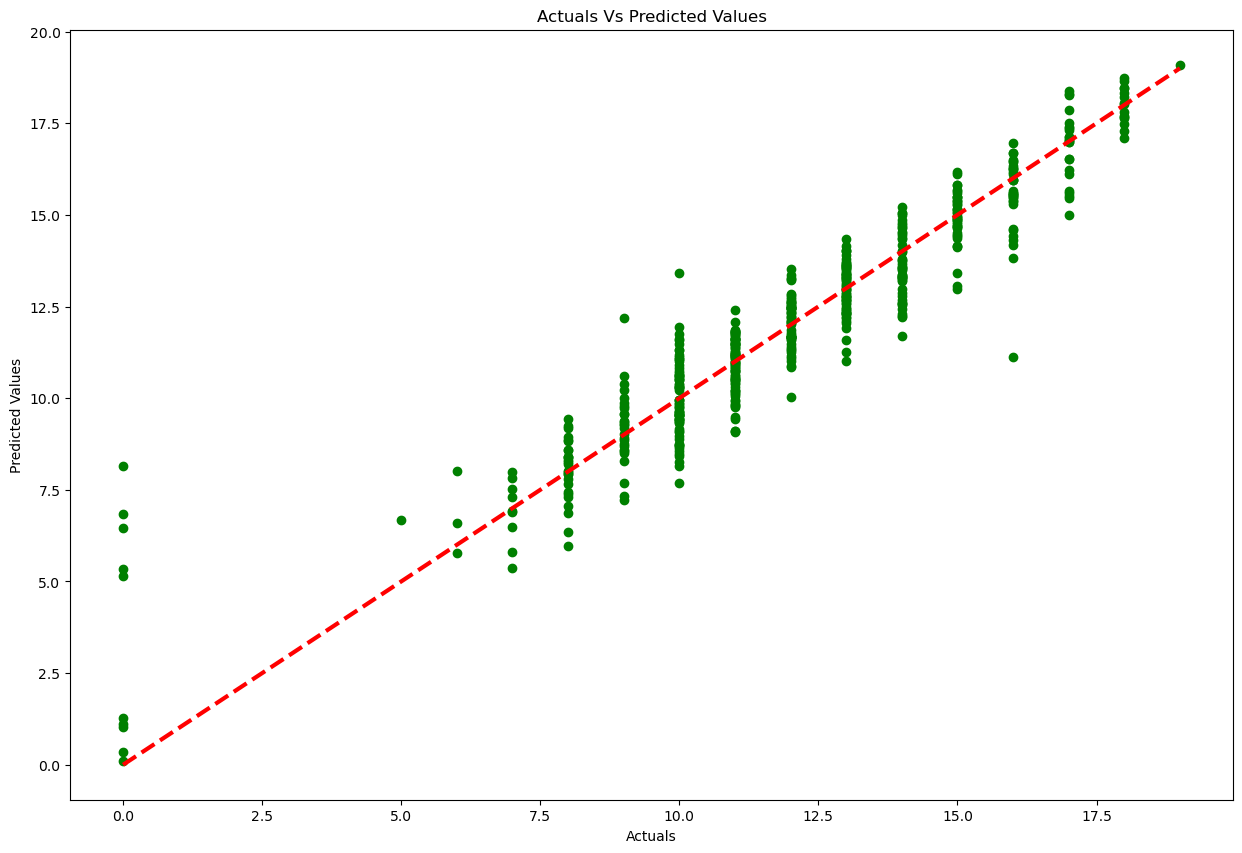

In [53]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

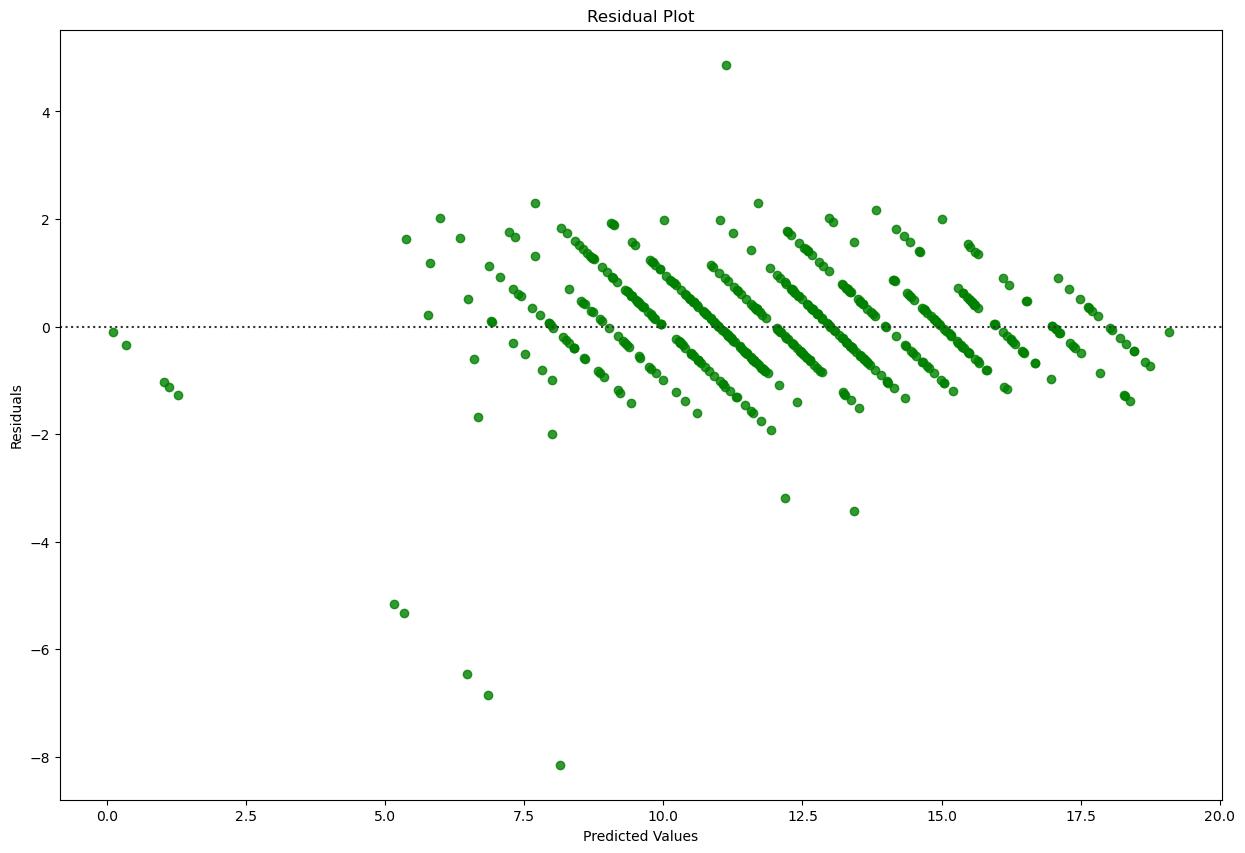

In [54]:
# Ploting Residuals
plt.figure(figsize=(15, 10))
sns.residplot(x=y_pred, y=y_train, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [59]:
# Passing Coeff into a table

Coeff = lm.coef_
Coeff.shape

# Reshaping
Coeff = Coeff.reshape(-1,58)


# Creating a Dataframe
Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# Displaying 
Coeff_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,0.002179,-0.017692,0.000243,0.146098,0.005978,-0.293095,0.045337,0.021667,-0.012174,0.00988,...,3.098502e+11,3.098502e+11,1.230004e+11,1.230004e+11,-9.869699e+11,-9.869699e+11,-1.270005e+11,-1.270005e+11,-7.166396e+11,-7.166396e+11


In [ ]:
# Making Predictions 